In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Student Mental Health Analysis

## Objective

Through this analysis, we aim to discern patterns and correlations that can inform targeted interventions and support systems for students. Understanding how age, CGPA, marital status, and depression status intertwine provides a holistic perspective, fostering a deeper appreciation of the challenges and triumphs that students may face during their educational journey.

As we navigate this dataset, the goal is to contribute meaningful insights that not only enhance our understanding of student dynamics but also lay the groundwork for developing tailored strategies to support student well-being and academic success.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Uploading datasets

In [148]:
#Loading of the Dataset
data = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv')

#Checking the information of the dataset
#Top 3
data.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [149]:
#Last 3
data.tail(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


In [ ]:
#get column info
data.info()

In [ ]:
#Check null values
data.isna().sum()


In [ ]:
#check row and column number
data.shape

In [ ]:
##returns description of the data in the DataFrame (in this case age)
data.describe()

From the descriptive table above, the statistics shows that the Mean Age of the students in the dataset is around 20.53 years. The age values are dispersed by approximately 2.49628 years. Minimum and Maximum Ages is 18 and 24 respectively. In addition, 25% of the students are 18 years old or younger. 50% of the students are 19 years old while, 75% of the individuals are 23 years old.

## Duplicate dataset
Copy of data is made. This is to ensure that any changes or modifications done 
during processing or analysis will not affect the original dataset, hence 
dataset is duplicated. This helps to preserve the accuracy of your data.

In [ ]:
data.duplicated().sum()

cdata = data.copy()


## Data Cleaning and Tranformation

There is only one null value in the dataset so dropping it won't affect our analysis. However, there are discrepancies in the data type of some columns, so we need to convert them to the correct data type. It is important also to change the column names to make them more user-friendly and readable. So here is a list of tasks to ensure clean data:

- Renaming of column labels for easy identification and manipulation.
- Handling missing values
- Cast type variables in thier correct format
- Correctly formatting columns and remove whitespace
- Renaming of variables for readability

In [ ]:
cdata.columns

In [ ]:
#Renaming of column labels for easy identification and manipulation
cdata.columns = ['Timestamp', 'Gender', 'Age', 'Major',
       'Year of Study', 'CGPA', 'Marital status',
       'Depression', 'Anxiety',
       'Panic attack',
       'Treatment']

cdata

In [ ]:
cdata['Year of Study'].unique()

There are some discrepancies with the year of study resulting in similarity in the unique value. Replace method will be applied to correct this discrepancies.

In [ ]:
cdata['Year of Study'].replace({'year 1': 'year 1', 'year 2': 'year 2', 'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2',
       'Year 3': 'year 3'}, inplace = True)

In [ ]:
#Check
cdata['Year of Study'].unique()

In [ ]:
cdata['Major'].unique()

In [ ]:
cdata['Major'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 
                        'BIT':'IT', 'psychology':'Psychology', 'koe': 'KOE','Koe': 'KOE', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'BENL': 'Benl', 
                        'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law', 'Econs': 'Economics'} , inplace = True)

In [150]:
#check
cdata['Major'].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Usuluddin ',
       'TAASL', 'ALA', 'Biomedical science', 'Benl', 'CTS', 'Economics',
       'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology',
       'Communication ', 'Diploma Nursing', 'Pendidikan Islam ',
       'Radiography', 'Fiqh', 'DIPLOMA TESL', 'Nursing '], dtype=object)

In [ ]:
cdata['CGPA'].unique()

There are white spaces that need to be removed so that the range of CGPA will be accurate. The strip() method will be applied.

In [151]:
cdata['CGPA'] = cdata['CGPA'].str.strip()

cdata['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

There is a missing value in the Age column. Refer to data.info().

### Converting to the Proper Data Types

In [198]:
cdata['Age'] = cdata['Age'].astype(int)

In [199]:
cdata['CGPA'] = cdata['CGPA'].astype(str)

# Function to handle ranges by taking the average
def convert_gpa(value):
    if '-' in value:
        start, end = map(float, value.split(' - '))
        return round((start + end) / 2, 2)
    else:
        return round(float(value), 2)

# Apply the function to the 'GPA' column
cdata['CGPA'] = cdata['CGPA'].apply(convert_gpa).astype(float)

In [196]:
cdata['CGPA'].info

<bound method Series.info of 0      3.25
1      3.25
2      3.25
3      3.25
4      3.25
       ... 
96     3.75
97     3.25
98     3.75
99     3.75
100    3.25
Name: CGPA, Length: 101, dtype: float64>

In [197]:
median_age = cdata['Age'].median()
median_age 

19.0

In [155]:
cdata['Age'] = cdata['Age'].fillna(median_age)


In [156]:
#Type casting the Age and TimeStamp columns to integer type and datatime using the astype()

cdata['Age'] = cdata['Age'].astype(int)

In [ ]:
cdata.info()

In [157]:
cdata['Depression'].unique()

array(['Yes', 'No'], dtype=object)

In [158]:
#The target variable in the data is the depression-related column. 
#For this reason, renaming it is essential in order to improve readability and 
#enable visualization.Other columns with yes and no response will be rename also.

cdata['Depression'] = cdata['Depression'].replace({'Yes': 'Depressed', 
                                                   'No': 'Not depressed'})
cdata['Depression'].unique()


array(['Depressed', 'Not depressed'], dtype=object)

In [159]:
cdata.columns

Index(['Timestamp', 'Gender', 'Age', 'Major', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

In [160]:
cdata['Panic attack'].unique()


array(['Yes', 'No'], dtype=object)

In [163]:
cdata['Panic attack'] = cdata['Panic attack'].replace({'Yes': 'Panic attack', 'No': 'No panic_attack'})

In [162]:
cdata['Anxiety'] = cdata['Anxiety'].replace({'Yes': 'Anxiety_present', 'No': 'No_anxiety'})

cdata['Anxiety'].unique()


array(['No_anxiety', 'Anxiety_present'], dtype=object)

In [164]:
cdata['Treatment'] = cdata['Treatment'].replace({'Yes': 'Treatment', 'No': 'No_treatment'})

cdata['Treatment'].unique()

array(['No_treatment', 'Treatment'], dtype=object)

In [165]:
cdata

,Timestamp,Gender,Age,Major,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Depressed,No_anxiety,Panic attack,No_treatment
1,8/7/2020 12:04,Male,21,Islamic Education,year 2,3.00 - 3.49,No,Not depressed,Anxiety_present,No panic_attack,No_treatment
2,8/7/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,No,Depressed,Anxiety_present,Panic attack,No_treatment
3,8/7/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Yes,Depressed,No_anxiety,No panic_attack,No_treatment
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,No,Not depressed,No_anxiety,No panic_attack,No_treatment
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21,BCS,year 1,3.50 - 4.00,No,Not depressed,Anxiety_present,No panic_attack,No_treatment
97,13/07/2020 21:21:42,Male,18,Engineering,year 2,3.00 - 3.49,No,Depressed,Anxiety_present,No panic_attack,No_treatment
98,13/07/2020 21:22:56,Female,19,Nursing,year 3,3.50 - 4.00,Yes,Depressed,No_anxiety,Panic attack,No_treatment
99,13/07/2020 21:23:57,Female,23,Pendidikan Islam,year 4,3.50 - 4.00,No,Not depressed,No_anxiety,No panic_attack,No_treatment


## DATA EXPLORATION

In this section variables are explore in order to understand the distribution of variables, the range and variability of the data.

In [166]:
cdata.columns

Index(['Timestamp', 'Gender', 'Age', 'Major', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

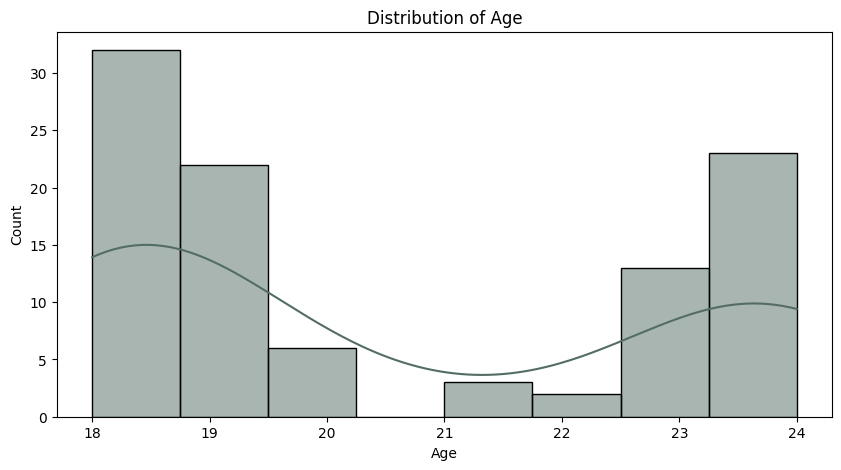

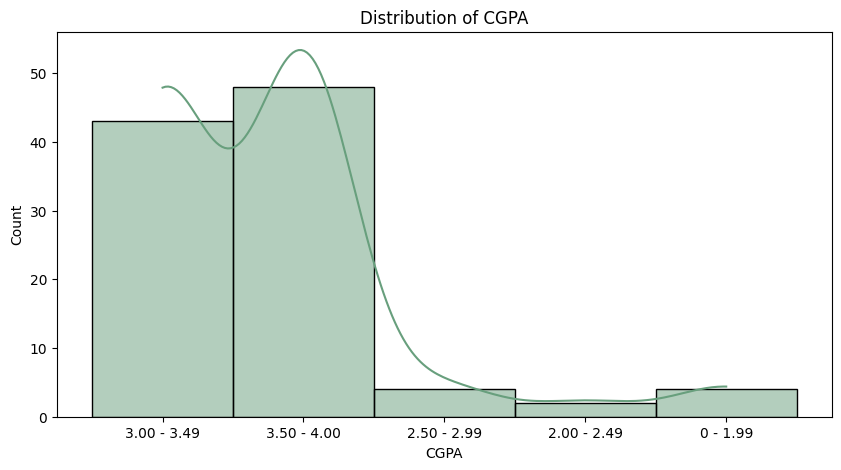

In [167]:
numerical_variables = ['Age', 'CGPA']
colors = ['#546D64', '#689F7D']

for column, color in zip(numerical_variables, colors):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=cdata, x = column, kde=True, color = color)
    plt.title(f'Distribution of {column}')
    plt.show()

Majority of the students fall in the age range 18-19 and 23-24.This distribution account for the fact that most of the students are in the first year. Most of the students have excellent performance, reasons why the majority of students fall in the CGPA ranges of 3.0 - 3.49 and 3.5 - 4.00.

## Distribution of Male and Female Students

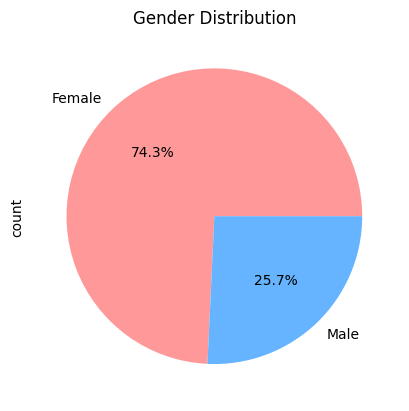

In [168]:
cdata.Gender.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Gender Distribution')
plt.show()

* There is a significant proportion of female students compared to male students.

### The Age Distribution Among Different Academic Levels

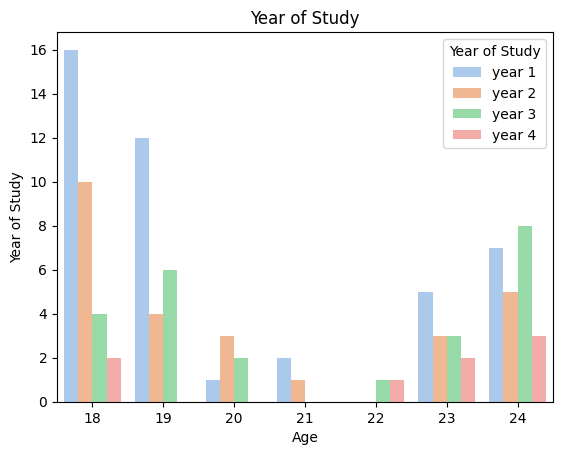

In [169]:
sns.countplot(x='Age', hue='Year of Study', data=cdata, palette='pastel')
plt.title('Year of Study')
plt.xlabel('Age')
plt.ylabel('Year of Study')
plt.show()

The visualization emphasizes a substantial concentration of students in their first year of study. This observation points to a notable pattern where a significant portion of the student body is situated in the initial stages of their academic journey. Interestingly, the data reveals instances of students under the age of 18 in their final year of study, presenting an unexpected demographic distribution within this advanced academic stage.

### Attributes or interests within age groups that drive their choice of Major

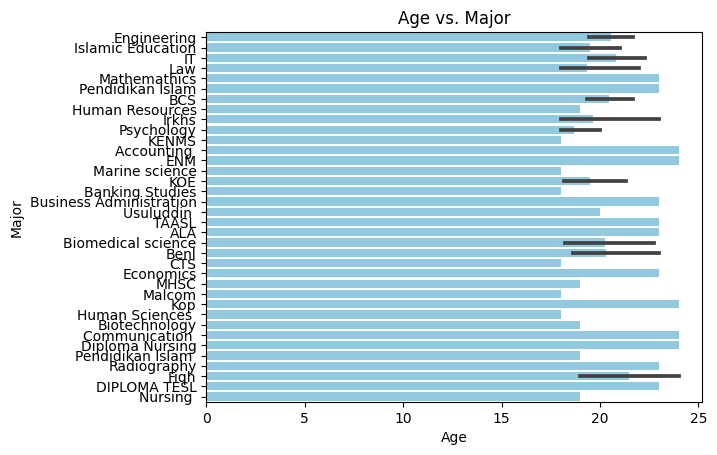

In [170]:
sns.barplot(x='Age', y='Major', data=cdata, color='skyblue')
plt.title('Age vs. Major')
plt.xlabel('Age')
plt.ylabel('Major')
plt.show()

The majority of students under the age of 20 are predominantly pursuing disciplines such as Nursing, Sciences, Engineering, Law and Human Science. This concentration suggests a distinct academic preference among this age group, highlighting the prevalence of these specific majors within the younger student demographic

### Distribution of Marital Status

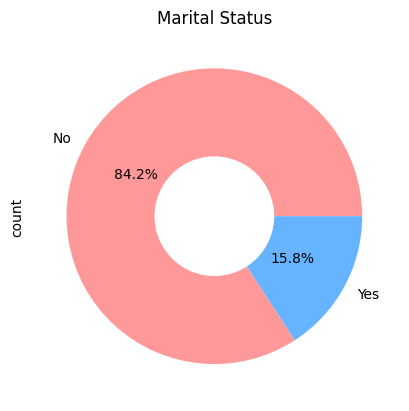

In [171]:
cdata['Marital status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()

The data reveals that 16% of the students are married, while the majority, accounting for 84%, are single. This distribution is attributed to the demographic composition of the surveyed students, with a significant portion being teenagers or in their early twenties.

In [172]:
cdata['Depression'].value_counts()

Depression
Not depressed    66
Depressed        35
Name: count, dtype: int64

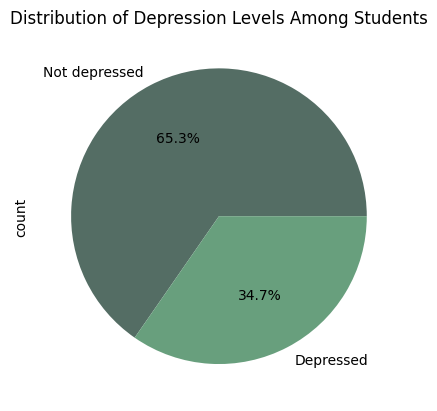

In [173]:
cdata['Depression'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#546D64','#689F7D'])
plt.title('Distribution of Depression Levels Among Students')
plt.show()

From the total number of students in the data, 34.7% account for students that are depressed, although the rate is below 50% this is rate is a call for concern given that mental health deals with the overall wellbeing of the students.

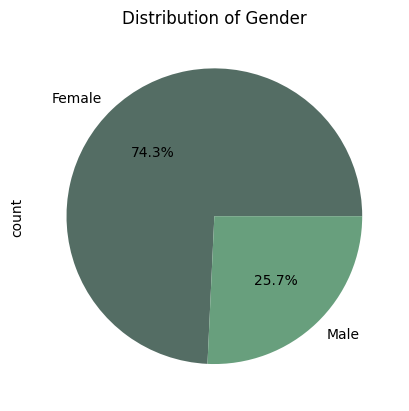

In [174]:
cdata['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#546D64','#689F7D'])
plt.title('Distribution of Gender')
plt.show()

74.3% of the student population is made up of female which shows that there are more female in the data compare to 25.7% of male.

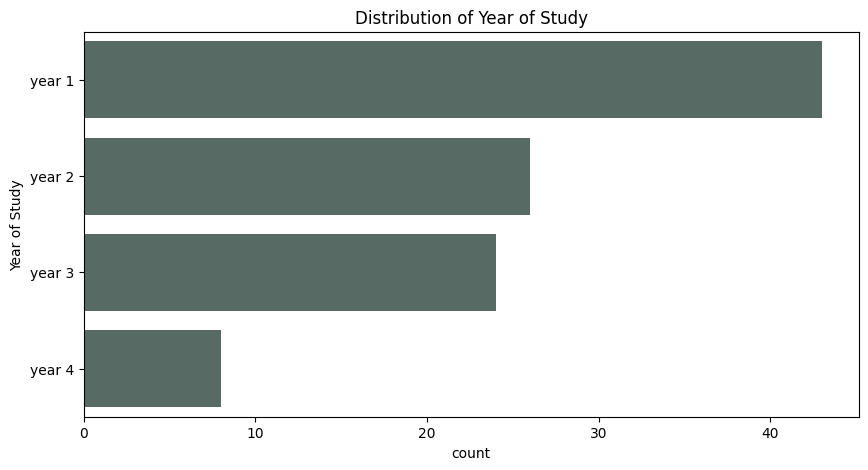

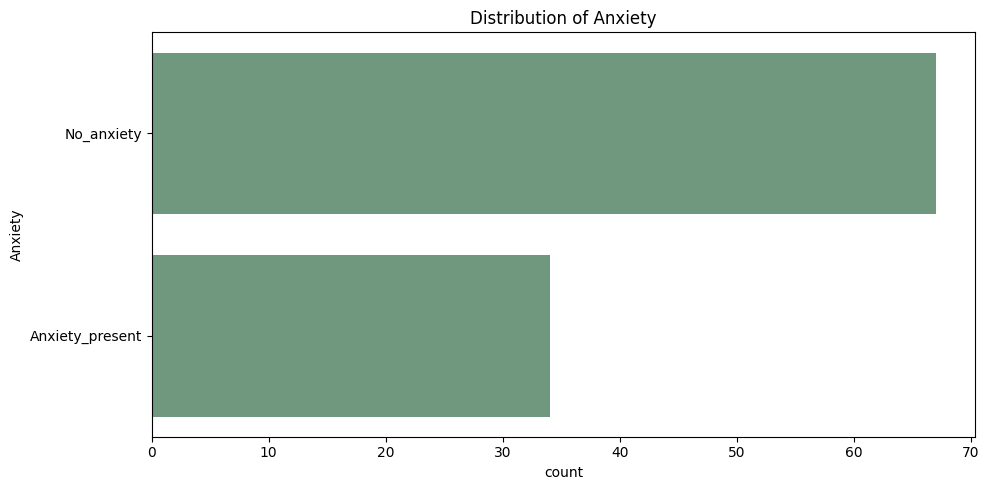

In [175]:
categorical_variables = [ 'Year of Study', 'Anxiety']
colors = ['#546D64', '#689F7D']

for column, color in zip(categorical_variables, colors):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=cdata, y=column, color=color)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Majority of the students are in their first year. This could be one of the reasons why the dominant age group is 18 and 19. For the count of students with anxiety a considerable count (30 and above) for students experiencing anxiety and 60% and above are not experiencing anxiety.

In [176]:
len(cdata['Major'].unique())


36

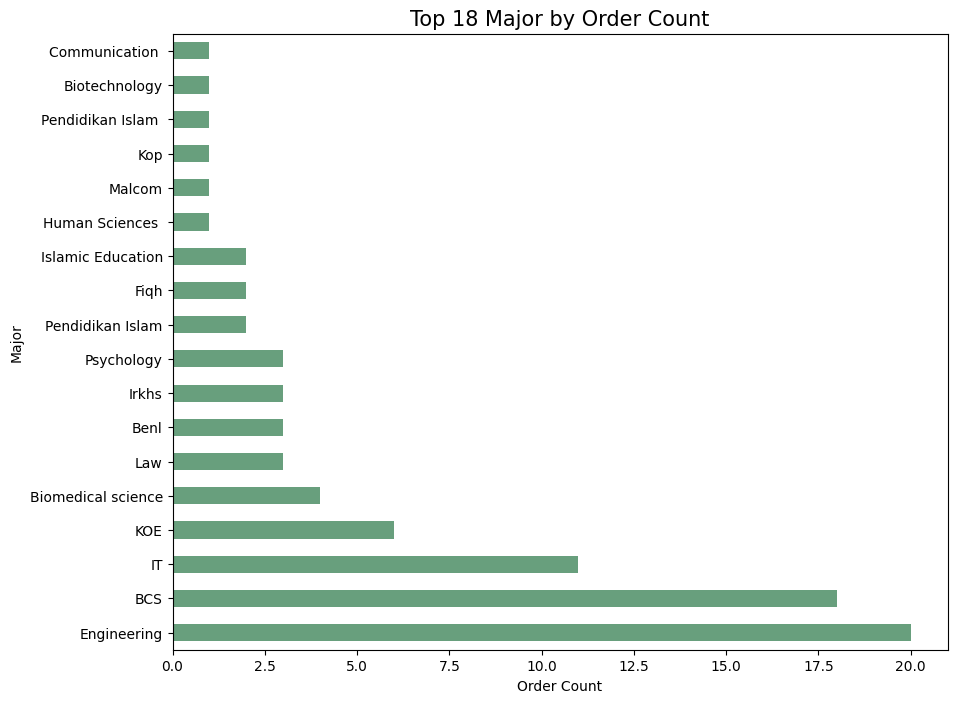

In [177]:
plt.figure(figsize=(10, 8))
cdata.Major.value_counts().iloc[:18].plot(kind='barh',color= '#689F7D' )
plt.title('Top 18 Major by Order Count', fontsize=15)
plt.xlabel('Order Count')
plt.ylabel('Major')
plt.show()

The majority of the students are enrolled in engineering and BCS relative to other courses which has less number of students.





## Depression Analysis

Since our analysis is to understand student mental health, a new data frame is created, a new frame with only student who indicated depression since it is our target variable.

In [178]:
cdata['Depression'].unique()

array(['Depressed', 'Not depressed'], dtype=object)

In [179]:
depression_df = cdata[cdata.Depression == 'Depressed']
depression_df

,Timestamp,Gender,Age,Major,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Depressed,No_anxiety,Panic attack,No_treatment
2,8/7/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,No,Depressed,Anxiety_present,Panic attack,No_treatment
3,8/7/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Yes,Depressed,No_anxiety,No panic_attack,No_treatment
6,8/7/2020 12:32,Female,23,Pendidikan Islam,year 2,3.50 - 4.00,Yes,Depressed,No_anxiety,Panic attack,No_treatment
11,8/7/2020 12:39,Female,24,Engineering,year 3,3.50 - 4.00,Yes,Depressed,No_anxiety,No panic_attack,No_treatment
12,8/7/2020 12:40,Female,18,BCS,year 1,3.00 - 3.49,No,Depressed,No_anxiety,No panic_attack,No_treatment
17,8/7/2020 12:52,Female,24,ENM,year 4,3.00 - 3.49,Yes,Depressed,Anxiety_present,Panic attack,No_treatment
19,8/7/2020 13:07,Female,18,Marine science,year 2,3.50 - 4.00,Yes,Depressed,Anxiety_present,Panic attack,No_treatment
24,8/7/2020 13:17,Female,23,BCS,year 3,3.50 - 4.00,No,Depressed,Anxiety_present,Panic attack,No_treatment
27,8/7/2020 13:41,Male,18,Engineering,year 2,3.00 - 3.49,Yes,Depressed,Anxiety_present,No panic_attack,No_treatment


In [180]:
depression_df.info()

#Number of depressed student across gender

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 98
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       35 non-null     object
 1   Gender          35 non-null     object
 2   Age             35 non-null     int64 
 3   Major           35 non-null     object
 4   Year of Study   35 non-null     object
 5   CGPA            35 non-null     object
 6   Marital status  35 non-null     object
 7   Depression      35 non-null     object
 8   Anxiety         35 non-null     object
 9   Panic attack    35 non-null     object
 10  Treatment       35 non-null     object
dtypes: int64(1), object(10)
memory usage: 3.3+ KB


In [181]:
depression_df.Gender.value_counts(normalize=True)

Gender
Female    0.828571
Male      0.171429
Name: proportion, dtype: float64

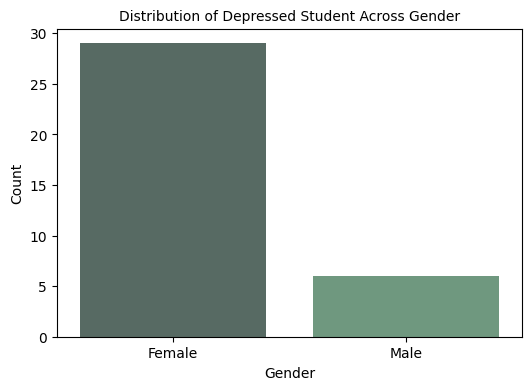

In [182]:
colors = ['#546D64', '#689F7D']

plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='Gender', palette=colors)
plt.title('Distribution of Depressed Student Across Gender', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#The distribution of Depressed Student Across Gender shows that more female 
#student are depressed relative to the male students.

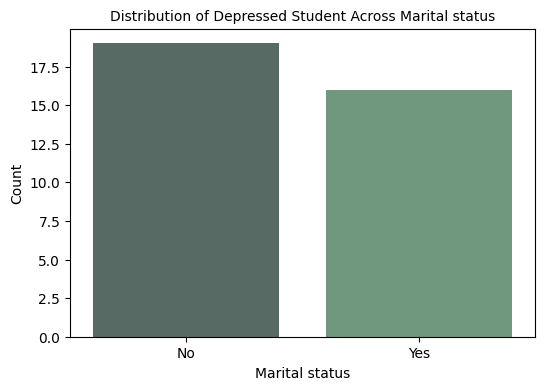

In [183]:
colors = ['#546D64', '#689F7D']

plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='Marital status', palette=colors)
plt.title('Distribution of Depressed Student Across Marital status', fontsize=10)
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()

For the distribution of students across married and unmarried, we see that the number of unmarried students that are depressed are more. 

This might be because the married students have support from their spouse which makes it easier for them to navigate life thus low number of married people being depressed.
OR 
Due to the fact that a married student might have built a stronger attitude due to the experiences gathered in matrimony which makes them more mentally stable than the unmarried students.

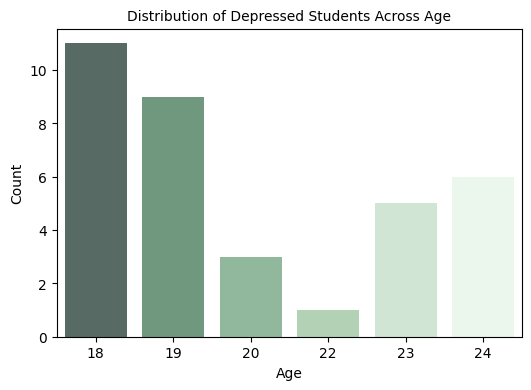

In [184]:
colors = ['#546D64', '#689F7D', '#8ABF99', '#AED6B1', '#CDE8D0', '#E9F8EB']

plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='Age', palette=colors)
plt.title('Distribution of Depressed Students Across Age', fontsize=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Across student age the proportion of students who are depressed falls within age 18 and 19. At 20 to 22 the proportion of depressed students decrease. There is also a noticeable increase in the number of depressed student from age 24.

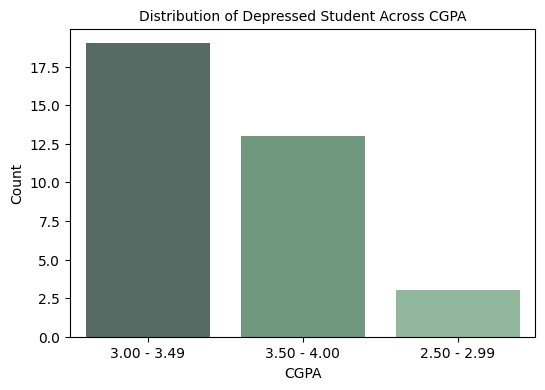

In [185]:
colors = ['#546D64', '#689F7D', '#8ABF99']
plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='CGPA', palette=colors)
plt.title('Distribution of Depressed Student Across CGPA', fontsize=10)
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

There are more depressed students with CGPA OF 3.00 - 3.49, followed by students with CGPA of 3.50 - 4.00. Only a few proportion of student with CGPA OF 2.50 - 2.99 are depressed.

In [187]:
depression_df.columns

Index(['Timestamp', 'Gender', 'Age', 'Major', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

<Figure size 800x500 with 0 Axes>

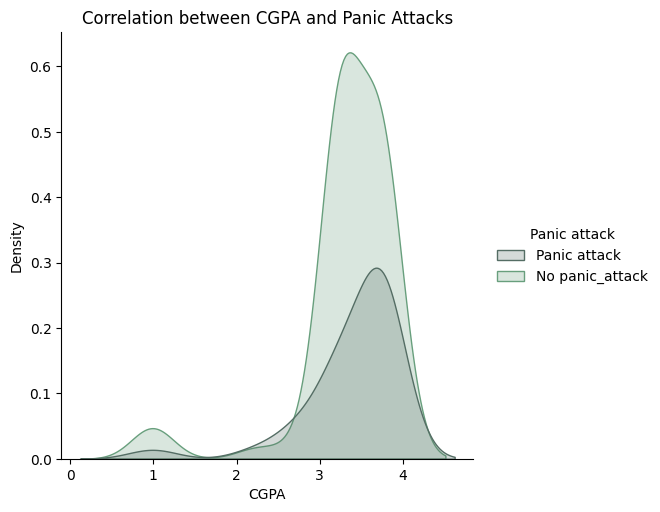

In [200]:
colors = {'Panic attack': '#546D64', 'No panic_attack': '#689F7D'}

plt.figure(figsize=(8, 5))
sns.displot(data=cdata, x='CGPA', hue='Panic attack', palette=colors, kind='kde', fill=True)
plt.title('Correlation between CGPA and Panic Attacks', fontsize=12)

plt.xlabel('CGPA')
plt.ylabel('Density')
plt.show()


The visualization reveals a significant correlation between Panic Attacks and CGPA. The positive correlation suggests that students who have a lower CGPA are more likely to experience panic attacks.

<Figure size 800x500 with 0 Axes>

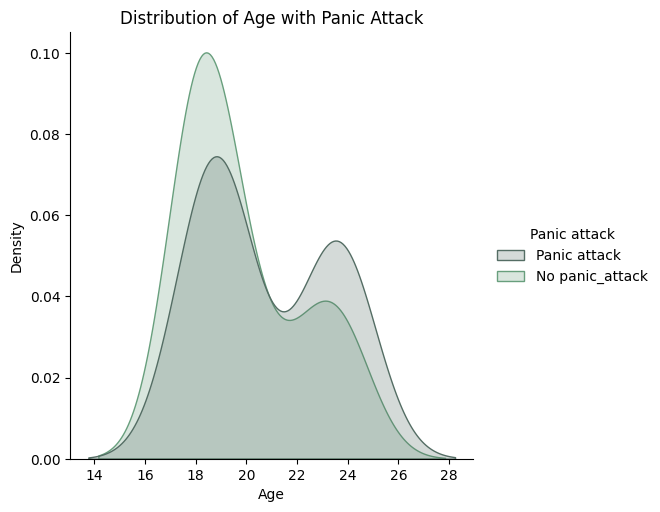

In [189]:
colors = {'Panic attack': '#546D64', 'No panic_attack': '#689F7D'}

plt.figure(figsize=(8, 5))
sns.displot(data=depression_df, x='Age', hue='Panic attack', palette=colors, kind='kde', fill=True)
plt.title('Distribution of Age with Panic Attack', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The density plot indicates that there are variations in the distribution of ages between students with panic and no panic attack. Also, students within the age of 18 and above without panic attack are more likely to be depressed relative to student with panic attack.

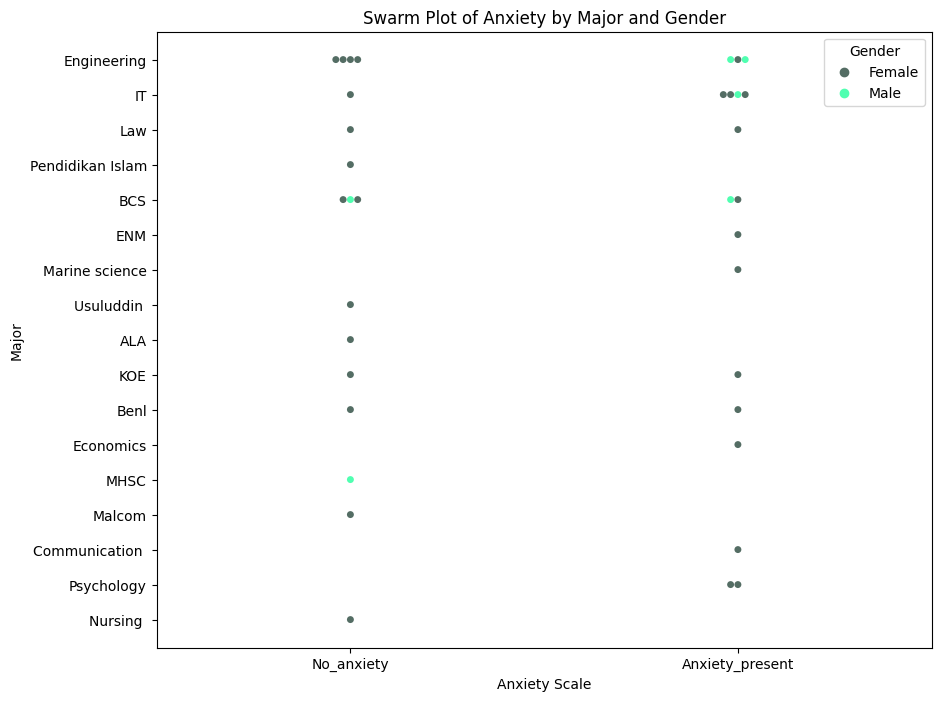

In [190]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=depression_df, x='Anxiety', y='Major', hue='Gender', palette=['#546D64', '#50FFB1'])
plt.title('Swarm Plot of Anxiety by Major and Gender')
plt.xlabel('Anxiety Scale')
plt.ylabel('Major')
plt.show()

More female students enrolled in engineering with no anxiety have depression compare to male student enrolled in engineering. while female student enrolled in IT with anxiety are more likely to have depression relative to male enrolled in IT. Overall there are variations in depression status across Major and anxiety level.

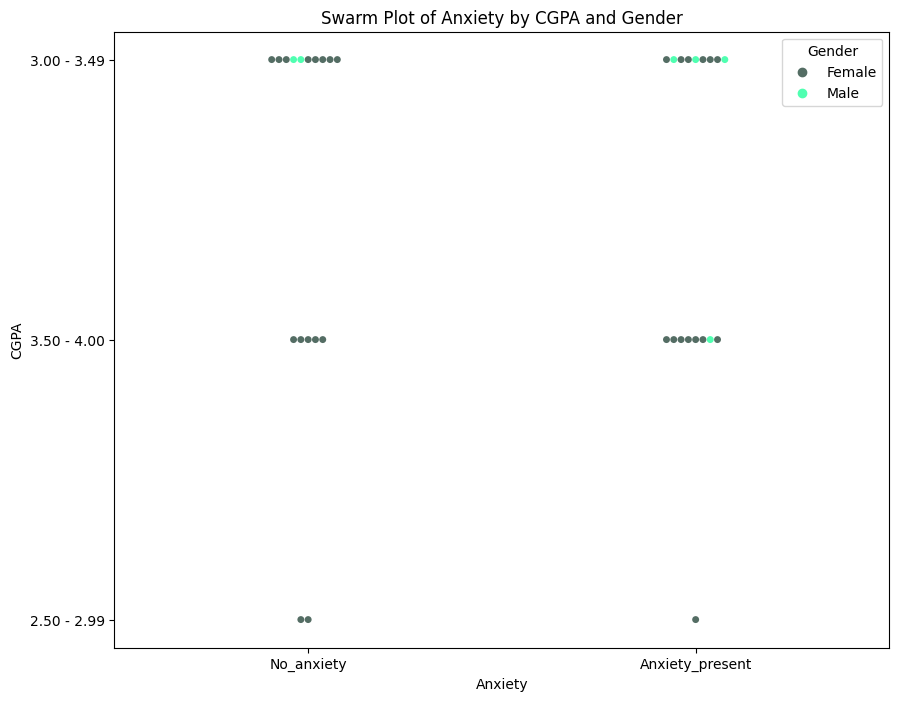

In [191]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=depression_df, x='Anxiety', y='CGPA', hue='Gender', palette=['#546D64', '#50FFB1'])
plt.title('Swarm Plot of Anxiety by CGPA and Gender')
plt.xlabel('Anxiety')
plt.ylabel('CGPA')
plt.show()

More female students with CGPA of 3.00 to 3.49 with no anxiety have depression compare to female student with depression. While female student with anxiety and CGPA of 3.50 to 4.00 are more likely to have depression relative female students without depression and same CGPA. Overall there are variations in depression among female student according to their CGPA. Female students with high CGPA tends to be anxious and this can lead to depression. Further analysis is needed to prove the relationship between this variables.

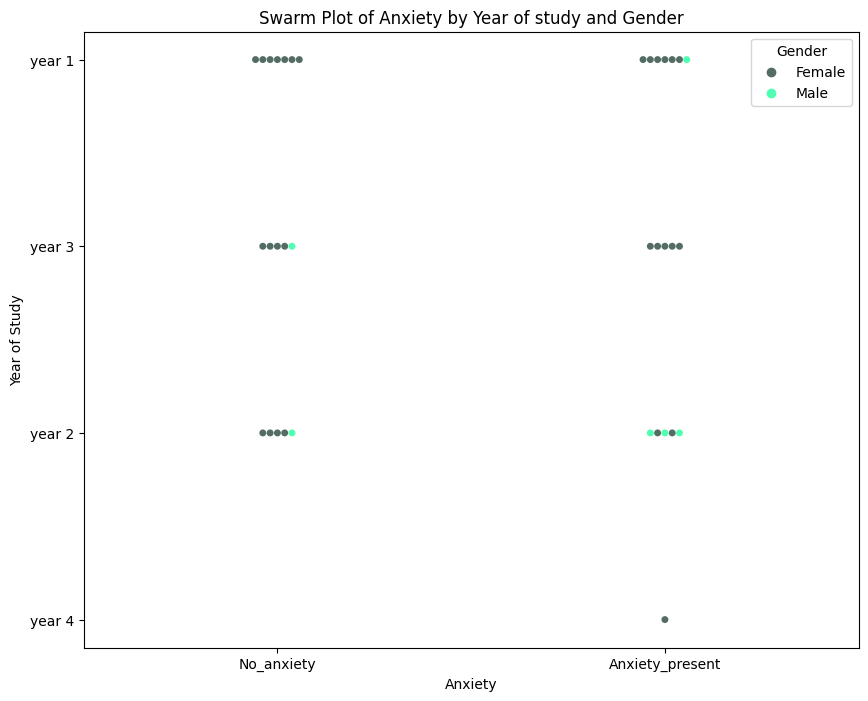

In [192]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=depression_df, x='Anxiety', y='Year of Study', hue='Gender', palette=['#546D64', '#50FFB1'])
plt.title('Swarm Plot of Anxiety by Year of study and Gender')
plt.xlabel('Anxiety')
plt.ylabel('Year of Study')
plt.show()

More female students in year with no anxiety have depression compare to female students with anxiety in same level. For year 2, more female student with no anxiety have depression. In year 3, more female students with anxiety have depression. Overall there are variations in depression across gender, Anxiety and year of students.

In [193]:
depression_df.columns

Index(['Timestamp', 'Gender', 'Age', 'Major', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

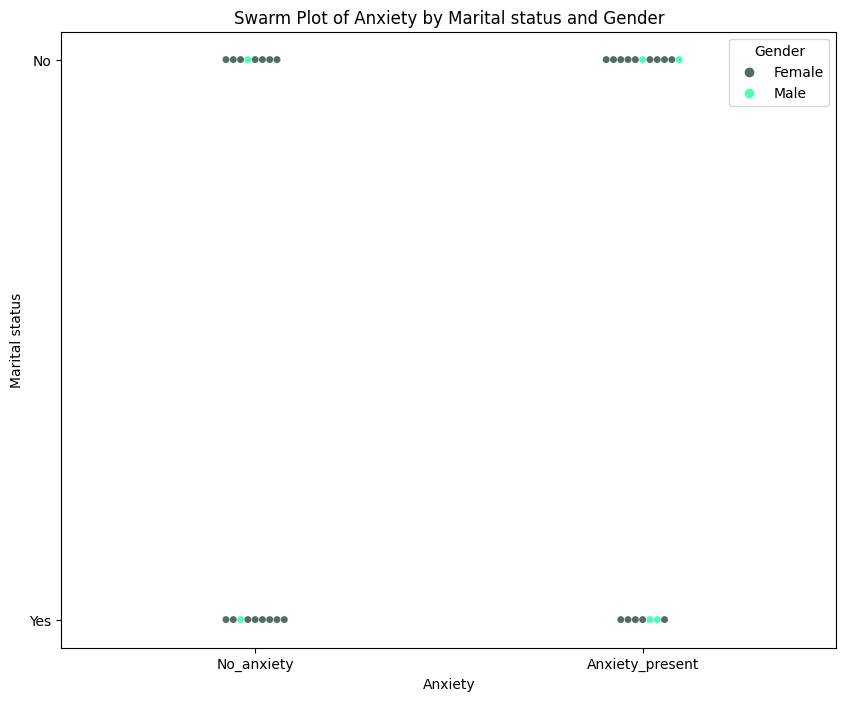

In [194]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=depression_df, x='Anxiety', y='Marital status', hue='Gender', palette=['#546D64', '#50FFB1'])
plt.title('Swarm Plot of Anxiety by Marital status and Gender')
plt.xlabel('Anxiety')
plt.ylabel('Marital status')
plt.show()

Student that present with anxiety and are not married are more susceptible to depression. Additonally, there are more female students with anxiety that are married. From this, we can that the prevelance of depression can be tied to anxiety and marital status.

# Conclusion


- Despite the overall depression rate being approximately 35% among students, a significant discovery emerges: students with a CGPA of 3.25 exhibit a higher prevalence of depression compared to those with CGPAs of 2.75 and 3.75. This intriguing finding prompts further investigation into the factors contributing to the heightened incidence of depression among students with a CGPA of 3.25.

- An intriguing pattern surfaces regarding panic attacks, particularly among second-year students. This observation prompts inquiries into potential stressors or challenges specific to the second year of academic pursuits that may influence the occurrence of panic attacks.

- Contrary to expectations, single students are found to experience instances of both panic attacks and depression compared to their married counterparts. This discovery challenges assumptions about the perceived support systems in marital relationships and underscores the need for a nuanced exploration of the factors influencing mental health across different relationship statuses.

- A concerning revelation is that none of the students who experienced depression sought medical treatment. This highlights a potential gap in mental health support systems, raising questions about the accessibility of mental health resources on campus and the necessity for interventions to encourage seeking professional help among affected students.